In [369]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use("seaborn-colorblind")

train = pd.read_csv("/home/emil/Documents/github/data-science/kaggle/Titanic/train.csv")
test = pd.read_csv("/home/emil/Documents/github/data-science/kaggle/Titanic/test.csv")

In [370]:
# Recon
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<IPython.core.display.Javascript object>


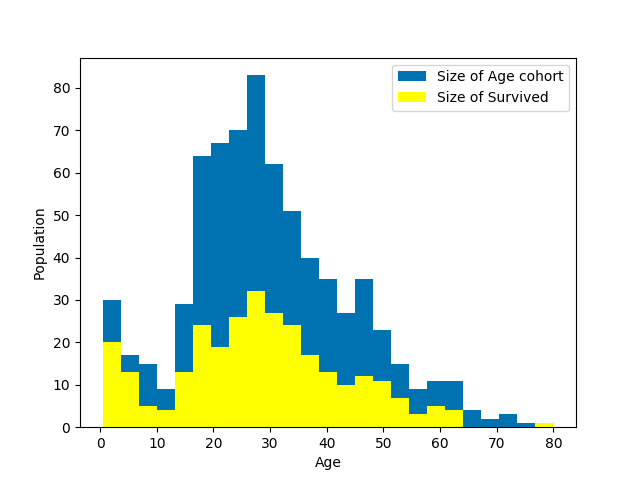

In [371]:
# Here I overlay two histograms on top of another
plt.figure()
plt.hist(train.loc[train.Age.notnull(), 'Age'], bins=25);
plt.hist(train.loc[ ((train.Survived == 1) & (train.Age.notnull()) ), 'Age'], color='yellow', bins=25);
ax = plt.gca();
ax.set_xlabel("Age");
ax.set_ylabel("Population");
ax.legend(['Size of Age cohort', 'Size of Survived']);

<IPython.core.display.Javascript object>


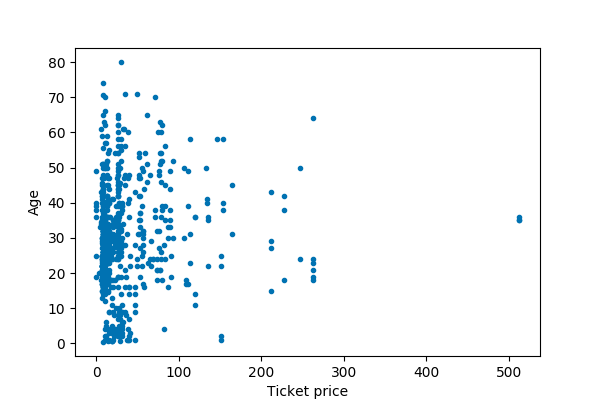

In [355]:
plt.figure(figsize=[6, 4])
plt.scatter(train.Fare, train.Age, marker='.');
ax = plt.gca()
ax.set_xlabel("Ticket price");
ax.set_ylabel("Age");
# Same result, less typing:
# df.plot('Fare', 'Age', kind="scatter")

<IPython.core.display.Javascript object>


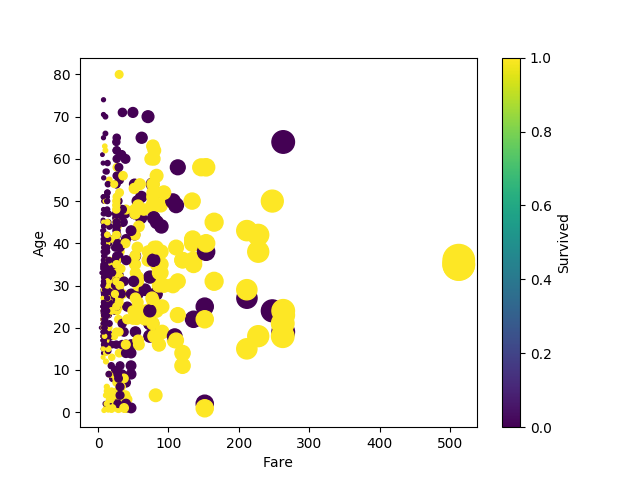

In [356]:
# You can also have a heatmap on each scatter plot by passing the c (color) parameter or s (size) parameter:
ax = train.plot.scatter('Fare', 'Age', c='Survived', colormap='viridis', s=train.Fare)
# This is same as plt.gca()
# ax.legend(['legend1'])

# Same as: plt.scatter(train.Fare, train.Age, marker='.', c=train.Survived, s=train.Fare);

<IPython.core.display.Javascript object>


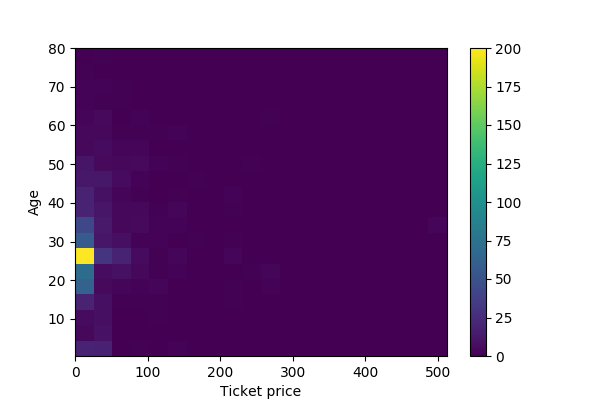

In [357]:
# The same data using a heatmap (2d histogram)

'''
Given a set of ordered pairs describing data points, 
you can count the number of points with similar values to construct a two-dimensional histogram. 
This is similar to a one-dimensional histogram, 
but it describes the joint variation of two random variables rather than just one.
''';

plt.figure(figsize=[6, 4])
plt.hist2d(train.Fare, train.Age.fillna(28), bins=20);
plt.colorbar()
ax = plt.gca()
ax.set_xlabel("Ticket price");
ax.set_ylabel("Age");

In [358]:
locations = train.groupby("Embarked").agg({'Survived' : np.sum, 'PassengerId' : len }).reset_index()
locations['% survived'] = round(locations.Survived / locations.PassengerId, 2)
locations

,Embarked,PassengerId,Survived,% survived
0,C,168,93,0.55
1,Q,77,30,0.39
2,S,644,217,0.34


<IPython.core.display.Javascript object>


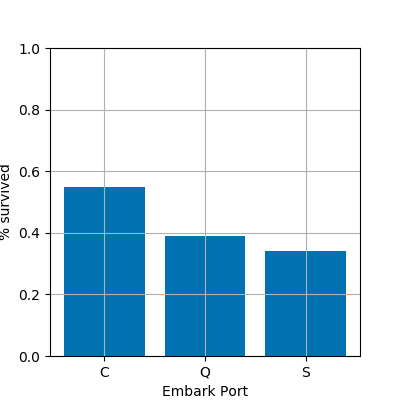

In [359]:
plt.figure(figsize=(4, 4))
ax = plt.gca()
ax.grid()
plt.bar([1, 2, 3], locations['% survived'])
plt.xticks([1, 2, 3])

ax.set_xticklabels(locations.Embarked)
ax.set_ylim([0, 1])
ax.set_ylabel("% survived");
ax.set_xlabel("Embark Port");

In [360]:
train.Age.median(), round(train.Age.mean(), 0)

(28.0, 30.0)

In [361]:
train.Cabin.value_counts(dropna=False)[:10]

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
D                3
F2               3
F33              3
E101             3
C22 C26          3
E8               2
Name: Cabin, dtype: int64

In [362]:
train.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [363]:
gender = train[['Sex', 'Survived']].groupby("Sex").agg([np.sum, np.size])
gender['% survived'] = gender['Survived']['sum'] / gender['Survived']['size']
gender

Survived      % survived
            sum size           
Sex                            
female      233  314   0.742038
male        109  577   0.188908

In [364]:
for df in [train, test]:
    df.Sex = df.Sex.map({'male' : 0, 'female' : 1})
    df.Embarked = df.Embarked.map({'S': 0, 'C' : 1, 'Q' : 2})
    df.Embarked.fillna(value=train.Embarked.value_counts(sort=True).index[0], inplace=True)
    df.Age.fillna(value=29, inplace=True)

In [365]:
train.groupby("Pclass").agg({'Fare' : np.mean})

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [366]:
class_survival = train[['Pclass', 'Survived']].groupby("Pclass").agg([np.size, np.sum])
class_survival['% survived'] = round(class_survival['Survived']['sum'] /  class_survival['Survived']['size'], 2)
class_survival

Survived      % survived
           size  sum           
Pclass                         
1           216  136       0.63
2           184   87       0.47
3           491  119       0.24